In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [2]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [3]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [4]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [5]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [6]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [7]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [8]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
3


array([0, 1, 2, ..., 0, 1, 2])

In [9]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [10]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_3 (Dense)              (None, 524)               537100    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               67200     
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4

In [11]:
save = ModelCheckpoint('model_Foot_mi_temps.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [12]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=200,
                    callbacks = [save])

Train on 9251 samples, validate on 2313 samples
Epoch 1/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.1102 - accuracy: 0.4196
Epoch 00001: val_accuracy improved from -inf to 0.44834, saving model to model_Foot_mi_temps.h5
9251/9251 [==============================] - 5s 519us/sample - loss: 1.1097 - accuracy: 0.4210 - val_loss: 1.2271 - val_accuracy: 0.4483
Epoch 2/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0858 - accuracy: 0.4406
Epoch 00002: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 3s 297us/sample - loss: 1.0861 - accuracy: 0.4397 - val_loss: 1.1573 - val_accuracy: 0.4483
Epoch 3/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0836 - accuracy: 0.4383 - ETA: 0s - los
Epoch 00003: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 3s 297us/sample - loss: 1.0833 - accuracy: 0.4387 - val_loss: 1.1106 - val_accuracy: 0.4112
Epoch 4/200
9090/9251 

9180/9251 [============================>.] - ETA: 0s - loss: 1.0838 - accuracy: 0.4413
Epoch 00028: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 4s 411us/sample - loss: 1.0842 - accuracy: 0.4405 - val_loss: 1.1315 - val_accuracy: 0.4483
Epoch 29/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0868 - accuracy: 0.4416
Epoch 00029: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 4s 414us/sample - loss: 1.0876 - accuracy: 0.4405 - val_loss: 1.0967 - val_accuracy: 0.4341
Epoch 30/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0876 - accuracy: 0.4373
Epoch 00030: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 4s 414us/sample - loss: 1.0878 - accuracy: 0.4377 - val_loss: 2.0485 - val_accuracy: 0.4220
Epoch 31/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0876 - accuracy: 0.4397
Epoch 00031: val_accuracy did not imp

9180/9251 [============================>.] - ETA: 0s - loss: 1.0776 - accuracy: 0.4455
Epoch 00056: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 3s 355us/sample - loss: 1.0779 - accuracy: 0.4452 - val_loss: 1.0986 - val_accuracy: 0.4207
Epoch 57/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0768 - accuracy: 0.4446
Epoch 00057: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 3s 326us/sample - loss: 1.0769 - accuracy: 0.4444 - val_loss: 1.0705 - val_accuracy: 0.4483
Epoch 58/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0840 - accuracy: 0.4402
Epoch 00058: val_accuracy did not improve from 0.44834
9251/9251 [==============================] - 3s 327us/sample - loss: 1.0840 - accuracy: 0.4404 - val_loss: 1.0812 - val_accuracy: 0.4483
Epoch 59/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0799 - accuracy: 0.4413
Epoch 00059: val_accuracy did not imp

Epoch 84/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0884 - accuracy: 0.4392
Epoch 00084: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 373us/sample - loss: 1.0880 - accuracy: 0.4400 - val_loss: 1.0922 - val_accuracy: 0.4176
Epoch 85/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0776 - accuracy: 0.4430
Epoch 00085: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 353us/sample - loss: 1.0777 - accuracy: 0.4429 - val_loss: 1.0741 - val_accuracy: 0.4483
Epoch 86/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0807 - accuracy: 0.4409
Epoch 00086: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 374us/sample - loss: 1.0808 - accuracy: 0.4407 - val_loss: 1.1011 - val_accuracy: 0.4483
Epoch 87/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0805 - accuracy: 0.4438
Epoch 00087: val_accurac

Epoch 112/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0826 - accuracy: 0.4424
Epoch 00112: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 408us/sample - loss: 1.0833 - accuracy: 0.4412 - val_loss: 1.0785 - val_accuracy: 0.4388
Epoch 113/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0774 - accuracy: 0.4430
Epoch 00113: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 356us/sample - loss: 1.0774 - accuracy: 0.4434 - val_loss: 1.1129 - val_accuracy: 0.4483
Epoch 114/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0858 - accuracy: 0.4409
Epoch 00114: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 352us/sample - loss: 1.0854 - accuracy: 0.4409 - val_loss: 1.0788 - val_accuracy: 0.4483
Epoch 115/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0775 - accuracy: 0.4424
Epoch 00115: val_acc

Epoch 140/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0708 - accuracy: 0.4479
Epoch 00140: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 401us/sample - loss: 1.0708 - accuracy: 0.4478 - val_loss: 4.2061 - val_accuracy: 0.2741
Epoch 141/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0709 - accuracy: 0.4475
Epoch 00141: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 419us/sample - loss: 1.0707 - accuracy: 0.4478 - val_loss: 2.4719 - val_accuracy: 0.4483
Epoch 142/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0706 - accuracy: 0.4479 ETA: 0s - l
Epoch 00142: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 388us/sample - loss: 1.0706 - accuracy: 0.4478 - val_loss: 3.2413 - val_accuracy: 0.2776
Epoch 143/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0708 - accuracy: 0.4475
Epoch 00

Epoch 168/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0700 - accuracy: 0.4490
Epoch 00168: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 391us/sample - loss: 1.0706 - accuracy: 0.4478 - val_loss: 28.2617 - val_accuracy: 0.4483
Epoch 169/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0710 - accuracy: 0.4476
Epoch 00169: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 391us/sample - loss: 1.0709 - accuracy: 0.4478 - val_loss: 23.9628 - val_accuracy: 0.4483
Epoch 170/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0708 - accuracy: 0.4479
Epoch 00170: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 375us/sample - loss: 1.0708 - accuracy: 0.4478 - val_loss: 11.0867 - val_accuracy: 0.4483
Epoch 171/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0709 - accuracy: 0.4471
Epoch 00171: val_

Epoch 196/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0714 - accuracy: 0.4476
Epoch 00196: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 353us/sample - loss: 1.0713 - accuracy: 0.4478 - val_loss: 8.1469 - val_accuracy: 0.2776
Epoch 197/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0713 - accuracy: 0.4471
Epoch 00197: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 4s 379us/sample - loss: 1.0710 - accuracy: 0.4478 - val_loss: 3.1549 - val_accuracy: 0.4483
Epoch 198/200
9090/9251 [============================>.] - ETA: 0s - loss: 1.0705 - accuracy: 0.4481
Epoch 00198: val_accuracy did not improve from 0.44877
9251/9251 [==============================] - 3s 358us/sample - loss: 1.0707 - accuracy: 0.4478 - val_loss: 3.1101 - val_accuracy: 0.4483
Epoch 199/200
9180/9251 [============================>.] - ETA: 0s - loss: 1.0707 - accuracy: 0.4477
Epoch 00199: val_acc

Text(0, 0.5, 'Accuracy')

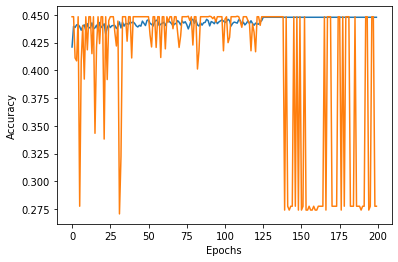

In [13]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [14]:
unique = x_prediction.values
results = []

i = 0
unique[1]
np.unique(y_train)
predictions_final = model.predict(np.array([x_train[59]]))
predictions_final.shape


(1, 3)

In [15]:
model.load_weights("model_Foot_mi_temps.h5")

In [16]:
results = []
zero =[]
un = []
deux = []
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    results.append(result)
    print(result,predictions_final)

2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.24369888 0.301692   0.4546091 ]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.24094571 0.30524242 0.45381182]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25803557 0.28377432 0.45819008]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25716433 0.28483656 0.4579991 ]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283

2 [[0.27870062 0.25953954 0.46175984]]
2 [[0.26490298 0.27551854 0.45957848]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283 0.44947994]]
2 [[0.25109726 0.29942283

In [17]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,2
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,2
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,2
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,2
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [18]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.json')

In [19]:
finished = []
scheduled = []

In [20]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [26]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)
df_fini = df_fini.sort_values(by = 'date',ascending= False)
df_programme= df_programme.sort_values(by = 'date',ascending= True)

In [27]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
87,2020-07-11,279546,FINISHED,449,100,Brescia Calcio,AS Roma,2
82,2020-07-11,279537,FINISHED,109,102,Juventus FC,Atalanta BC,2
79,2020-07-11,264683,FINISHED,64,328,Liverpool FC,Burnley FC,2
80,2020-07-11,264687,FINISHED,356,61,Sheffield United FC,Chelsea FC,2
81,2020-07-11,264688,FINISHED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
17,2020-07-04,264666,FINISHED,66,1044,Manchester United FC,AFC Bournemouth,2
3,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,2
2,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,2
1,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,2


In [28]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-12,264682,SCHEDULED,58,354,Aston Villa FC,Crystal Palace FC,2
62,2020-07-12,279542,SCHEDULED,112,103,Parma Calcio 1913,Bologna FC 1909,2
63,2020-07-12,279543,SCHEDULED,115,584,Udinese Calcio,UC Sampdoria,2
64,2020-07-12,279544,SCHEDULED,104,5890,Cagliari Calcio,US Lecce,2
65,2020-07-12,279538,SCHEDULED,113,98,SSC Napoli,AC Milan,2
...,...,...,...,...,...,...,...,...
123,2020-08-02,279603,SCHEDULED,449,584,Brescia Calcio,UC Sampdoria,2
128,2020-08-07,285543,SCHEDULED,109,523,Juventus FC,Olympique Lyonnais,2
127,2020-08-07,285535,SCHEDULED,65,86,Manchester City FC,Real Madrid CF,2
130,2020-08-08,285547,SCHEDULED,81,113,FC Barcelona,SSC Napoli,2


In [29]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.json')

In [30]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.json')